# Demo of the fit_functions.py module

In [1]:
import time
print("Run last on", time.asctime())

Run last on Thu Mar  9 11:55:12 2017


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8

In [3]:
import invisible_cities.core.fit_functions as fitf

## Data selection

We can select data in a range by applying the *in_range* function to it.

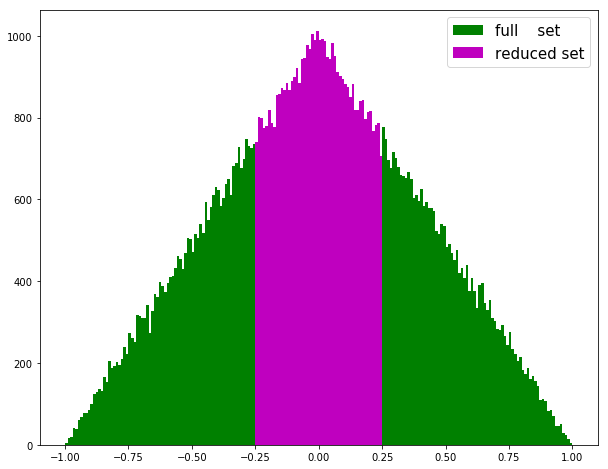

In [4]:
# create a dataset from a triangular distribution
x = np.random.rand(int(1e5)) - np.random.rand(int(1e5))

# select those in the range [-.25, .25)
x_sub = x[fitf.in_range(x, -0.25, 0.25)]

# let's plot an histogram of x in black
# and the same for x_sub in yellow
plt.hist(x    , 200, (-1, 1), color='g', label="full    set")
plt.hist(x_sub, 200, (-1, 1), color='m', label="reduced set")
plt.legend(prop={"size": 15});

## Predefined functions

We can use the most common functions defined in the module. Let's draw them.

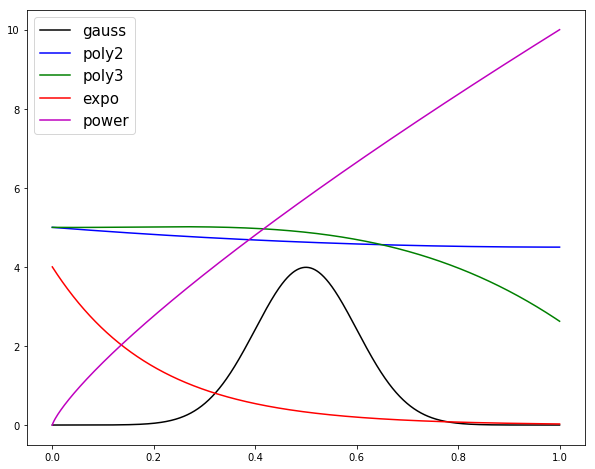

In [5]:
# generate a 1-dimensional grid
x = np.linspace(0, 1, 1000)

# gauss with amplitude 1/√(2pi)/sigma, mean 0.5 and sigma 0.1 (black)
y_gauss = fitf.gauss(x, 1, 0.5, 0.1)

# polynom 5 - x + 0.5 x^2 (blue)
y_poly2 = fitf.polynom(x, 5, -1, 0.5)

# polynom 5 - 0.125 x + 1.75 x^2 - 4 x^3 (green)
y_poly3 = fitf.polynom(x, 5, -0.125, 1.75, -4)

# exponential: 4 exp(-x/0.2) (red)
y_expo  = fitf.expo(x, 4, -0.2)

# power: 10 x^0.8 (purple)
y_power = fitf.power(x, 10, 0.8)

plt.plot(x, y_gauss, "k", label="gauss")
plt.plot(x, y_poly2, "b", label="poly2")
plt.plot(x, y_poly3, "g", label="poly3")
plt.plot(x, y_expo , "r", label="expo")
plt.plot(x, y_power, "m", label="power")
plt.legend(loc = "upper left", prop={"size": 15});

**Note how the degree of the polynom changes depending on the number of input parameters.**

## Fitting data

We can fit any dataset to a 1-D function given the x,y coordinates of its points.

#### Note

When creating an histogram with plt.hist (or np.histogram), it returns the *edges* of the bins. This means that the last element must be removed (it is the upper limit of the last bin) and the whole array shifted to get bin centers. This is done by the following function:

In [6]:
def get_centers(xbins):
    # xbins should be shifted, as it contains the lower bounds
    # and we want bin centers
    return xbins[:-1] + np.diff(xbins) * 0.5

### Gauss (from histogram)

/Users/Gonzalo/github/IC/invisible_cities/core/fit_functions.py:119: RuntimeWarning: divide by zero encountered in true_divide
  chi2 = np.sum(np.ma.masked_invalid((fitx - y)**2/y))


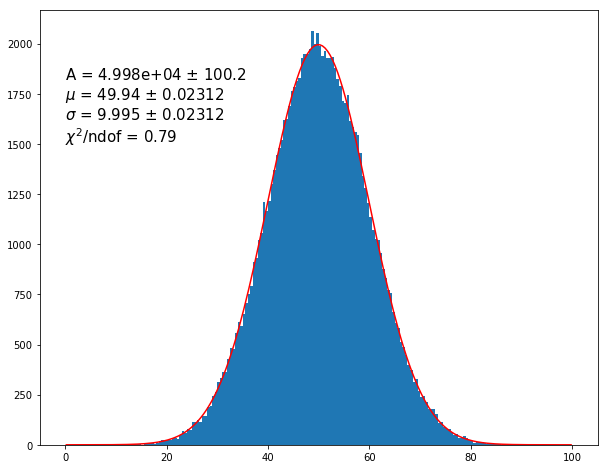

In [7]:
# generate gaussianly distributed data
x = np.random.normal(50., 10., size=int(1e5))

# histogram data and get bins in x and heights
entries, xbins, _ = plt.hist(x, 200, (0, 100))

# get bin centers
xbins = get_centers(xbins)

# fit data to a gaussian with seed (1, 10, 10)
fitres = fitf.fit(fitf.gauss, xbins, entries, (1, 10, 10))

# fitres contains four attributes:
#  - fn    : the function
#  - values: the coefficients that minimize the chi2
#  - errors: the errors associated with the coefficients
#  - chi2  : the chi2 of the fit
# Lets draw the result
plt.plot(xbins, fitres.fn(xbins), "r")
text = "\n".join(["{} = {:.4g} $\pm$ {:.4g}".format(name, val, err)
                  for name, val, err in zip("A $\mu$ $\sigma$".split(),
                                            fitres.values,
                                            fitres.errors)] + 
                 ["$\chi^2$/ndof = {:.2f}".format(fitres.chi2)])
plt.text(0, 1500, text, fontsize=15);

### Polynom (from scattered data)

Fitting x,y data is simpler than fitting histograms, as we don't need to extract x, y points.

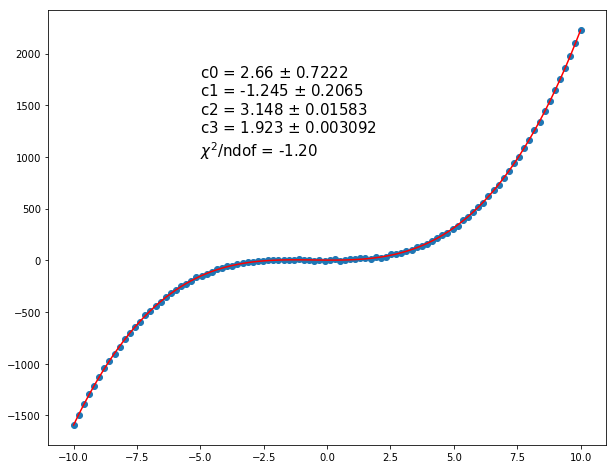

In [8]:
# generate data according to a polynom + gaussian noise
N  = 100
x  = np.linspace(-10, 10, N)
y  = 3.06 - x + np.pi * x**2 + 1.92 * x**3
y += np.random.normal(0, 5, size=N)

plt.scatter(x, y)
# fit data to a gaussian with seed (1, 10, 10)
fitres = fitf.fit(fitf.polynom, x, y, (1, -2, 1, 1))

# fitres contains four attributes:
#  - fn    : the function
#  - values: the coefficients that minimize the chi2
#  - errors: the errors associated with the coefficients
#  - chi2  : the chi2 of the fit
# Lets draw the result
plt.plot(x, fitres.fn(x), "r")
text = "\n".join(["{} = {:.4g} $\pm$ {:.4g}".format(name, val, err)
                  for name, val, err in zip("c0 c1 c2 c3".split(),
                                            fitres.values,
                                            fitres.errors)] +
                 ["$\chi^2$/ndof = {:.2f}".format(fitres.chi2)])
plt.text(-5, 1000, text, fontsize=15);

### Expo (from histogram)

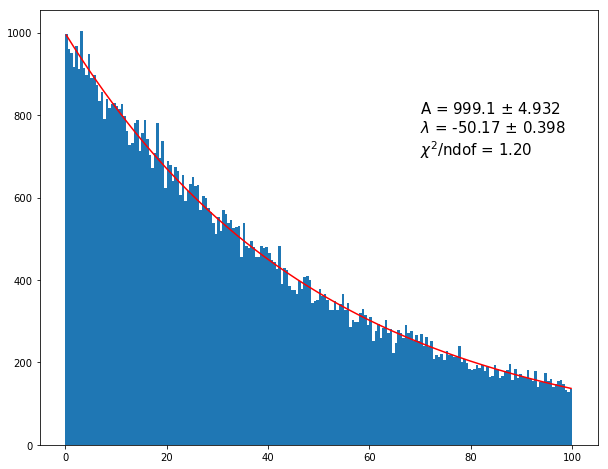

In [9]:
# generate data exponentially distributed 
x = np.random.exponential(50, size=int(1e5))

# histogram data and get bins in x and heights
entries, xbins, _ = plt.hist(x, 200, (0, 100))

# get bin centers
xbins = get_centers(xbins)

# fit data to a exponential with seed (50, -10)
fitres = fitf.fit(fitf.expo, xbins, entries, (50, -10))

# fitres contains four attributes:
#  - fn    : the function
#  - values: the coefficients that minimize the chi2
#  - errors: the errors associated with the coefficients
#  - chi2  : the chi2 of the fit
# Lets draw the result
plt.plot(xbins, fitres.fn(xbins), "r")
text = "\n".join(["{} = {:.4g} $\pm$ {:.4g}".format(name, val, err)
                  for name, val, err in zip("A $\lambda$".split(),
                                            fitres.values,
                                            fitres.errors)] +
                 ["$\chi^2$/ndof = {:.2f}".format(fitres.chi2)])
plt.text(70, 700, text, fontsize=15);

### Custom function (from histogram)

In the scenario of a complex (or simply different) distribution, we can still create our own function and pass it to the fitf.fit function.

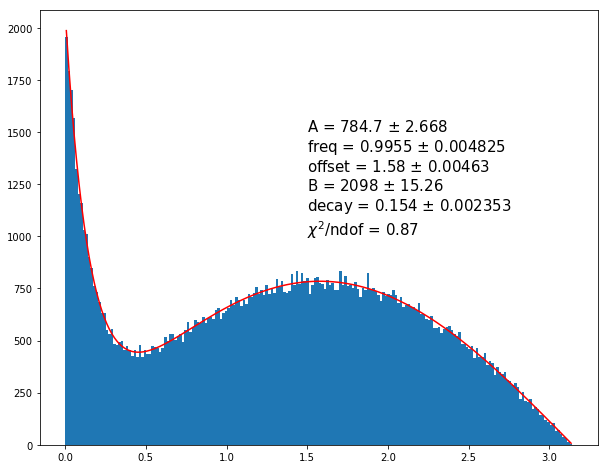

In [10]:
# generate data distributed as a cosine signal mounted on
# a uniform background
x1 = np.arccos(2*np.random.uniform(size=int(1e5)) - 1)
x2 = np.random.exponential(0.15, size=int(2e4))
x  = np.concatenate((x1, x2))

# histogram data and get bins in x and heights
entries, xbins, _ = plt.hist(x, 200, (0, np.pi))

# get bin centers
xbins = get_centers(xbins)

# create custom function
def custom_f(x, amp, freq, offset, bkg_amp, bkg_decay):
    # avoid problems of negative or zero frequencies
    if freq <= 0:
        return np.inf
    return amp * np.cos((x-offset)/freq) + bkg_amp * np.exp(-x/bkg_decay)


# fit data to a our custom function with seed (50, 2, 1, 1, 0.01)
fitres = fitf.fit(custom_f, xbins, entries, (50, 2, 1, 1, 0.01))

# fitres contains four attributes:
#  - fn    : the function
#  - values: the coefficients that minimize the chi2
#  - errors: the errors associated with the coefficients
#  - chi2  : the chi2 of the fit
# Lets draw the result
plt.plot(xbins, fitres.fn(xbins), "r")

text = "\n".join(["{} = {:.4g} $\pm$ {:.4g}".format(name, val, err)
                  for name, val, err in zip("A freq offset B decay".split(),
                                            fitres.values,
                                            fitres.errors)] +
                 ["$\chi^2$/ndof = {:.2f}".format(fitres.chi2)])
plt.text(1.5, 1000, text, fontsize=15);


Beautiful!

## Dataset profiles

When making scatter plots we usually want to see the average trend of the data along some axis. Lets see how.

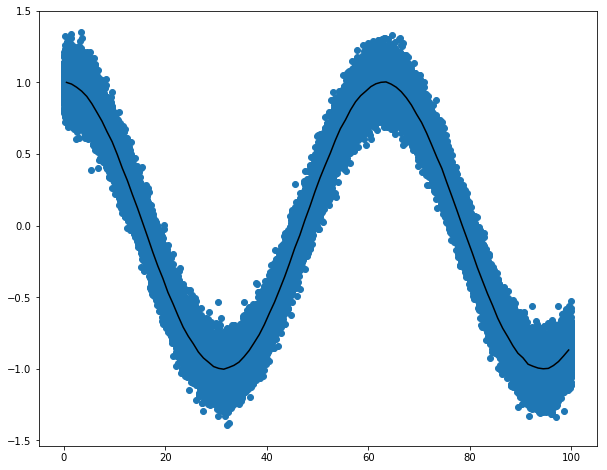

In [11]:
# create a custom dataset. x uniform between 0 and 100
# and y a function of x with some some gaussian distortion
N = int(1e5)
x = np.random.uniform(0, 100, size=N)
y = np.cos(x/10) + np.random.normal(0, 0.1, size=N)

# draw data
plt.scatter(x, y)

# get the average in x making 100 bins between dataset limits
xp, yp, ye = fitf.profileX(x, y, 100)

# draw it on top of the scatter plot to see it bahaves properly
plt.plot(xp, yp, "k");

Lets do the same with profileY

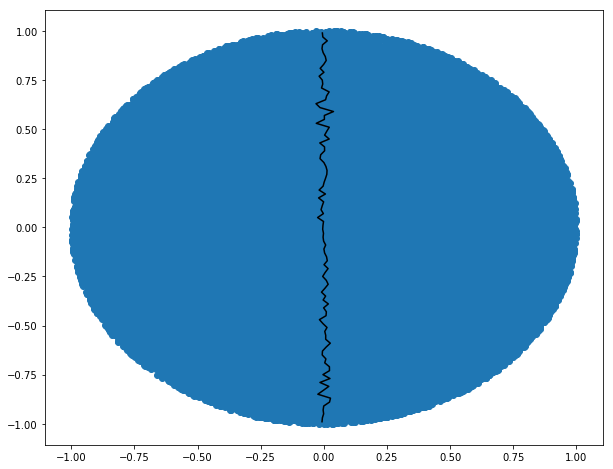

In [12]:
# create a custom dataset: data on a circle
N  = int(1e5)
x  = np.random.normal(size=N)
y  = np.random.normal(size=N)
r  = (x**2 + y**2)**0.5 / np.random.uniform(0., 1.0, size=N)
x /= r
y /= r

# draw data
plt.scatter(x, y)

# get the average in y making 100 bins between dataset limits
xp, yp, ye = fitf.profileY(x, y, 100)

# draw it on top of the scatter plot to see it bahaves properly
plt.plot(yp, xp, "k");